In [91]:
#Question 1

In [92]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Owner\Astron98_File\Astron98-Homework\HW7\global_air_quality.csv')
print(data)

     IndicatorCode                                          Indicator  \
0          SDGPM25  Concentrations of fine particulate matter (PM2.5)   
1          SDGPM25  Concentrations of fine particulate matter (PM2.5)   
2          SDGPM25  Concentrations of fine particulate matter (PM2.5)   
3          SDGPM25  Concentrations of fine particulate matter (PM2.5)   
4          SDGPM25  Concentrations of fine particulate matter (PM2.5)   
...            ...                                                ...   
9445       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
9446       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
9447       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
9448       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
9449       SDGPM25  Concentrations of fine particulate matter (PM2.5)   

     ValueType ParentLocationCode         ParentLocation Location type  \
0         text                AFR                

In [93]:
df = pd.read_csv(r'C:\Users\Owner\Astron98_File\Astron98-Homework\HW7\global_air_quality.csv')
df['PM25_Value'] = df['FactValueNumeric']
print(df[['FactValueNumeric', 'PM25_Value']])

      FactValueNumeric  PM25_Value
0                10.01       10.01
1                10.02       10.02
2                10.06       10.06
3                10.08       10.08
4                10.09       10.09
...                ...         ...
9445              9.92        9.92
9446              9.92        9.92
9447              9.94        9.94
9448              9.95        9.95
9449             92.79       92.79

[9450 rows x 2 columns]


In [94]:
africa_data = df[df['ParentLocation'] == 'Africa']
pm_25avg_africa_data = africa_data['PM25_Value'].mean()

americas_data = df[df['ParentLocation'] == 'Americas']
pm_25avg_americas_data = americas_data['PM25_Value'].mean()

europe_data = df[df['ParentLocation'] == 'Europe']
pm_25avg_europe_data = europe_data['PM25_Value'].mean()

western_pacific_data = df[df['ParentLocation'] == 'Western Pacific']
pm_25avg_western_pacific_data = western_pacific_data['PM25_Value'].mean()

south_east_asia_data = df[df['ParentLocation'] == 'South-East Asia']
pm_25avg_south_east_asia_data = south_east_asia_data['PM25_Value'].mean()

eastern_mediterranean_data = df[df['ParentLocation'] == 'Eastern Mediterranean']
pm_25avg_eastern_mediterranean_data = eastern_mediterranean_data['PM25_Value'].mean()

avg_pollution = {
    'Africa': pm_25avg_africa_data,
    'Americas': pm_25avg_americas_data,
    'Europe': pm_25avg_europe_data,
    'Western Pacific': pm_25avg_western_pacific_data,
    'South-East Asia': pm_25avg_south_east_asia_data,
    'Eastern Mediterranean': pm_25avg_eastern_mediterranean_data
}

df['Average_PM25'] = df['ParentLocation'].map(avg_pollution)
print(df[['Location', 'ParentLocation', 'PM25_Value', 'Average_PM25']])

avg_pollution_df = pd.DataFrame(list(avg_pollution.items()), columns=['ParentLocation', 'Average_PM25'])
print(avg_pollution_df) #When I print this out, I see that the continent with the highest air pollution is Eastern Mediterranean. This area is near large scale industrial activity.

                                               Location  \
0                                                 Kenya   
1                                   Trinidad and Tobago   
2     United Kingdom of Great Britain and Northern I...   
3                                               Grenada   
4                                                Brazil   
...                                                 ...   
9445                                             Belize   
9446                                Trinidad and Tobago   
9447                                              Kenya   
9448                           United States of America   
9449                                        Afghanistan   

             ParentLocation  PM25_Value  Average_PM25  
0                    Africa       10.01     29.812282  
1                  Americas       10.02     14.645728  
2                    Europe       10.06     19.244727  
3                  Americas       10.08     14.645728  
4          

In [95]:
final_df = df[['Location', 'ParentLocation', 'PM25_Value', 'Average_PM25']]
final_df.to_csv('updated_global_air_quality.csv', index=False)

In [96]:
#Question 2

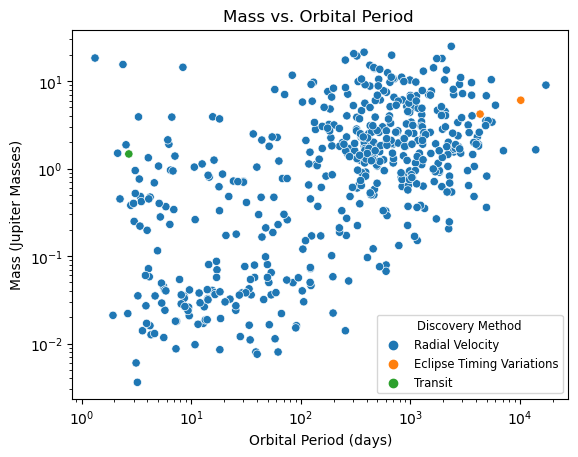

In [104]:
import seaborn as sns
data = sns.load_dataset('planets')
filtered_data = data.dropna(subset=['mass', 'orbital_period'])
plot = sns.scatterplot(data=filtered_data, x='orbital_period', y='mass', hue='method', palette='tab10')
plot.set_title("Mass vs. Orbital Period ")
plot.set_xlabel("Orbital Period (days)")
plot.set_ylabel("Mass (Jupiter Masses)")
plot.set(xscale="log", yscale="log")
plot.legend(title="Discovery Method", fontsize='small', title_fontsize='small')
plt.show()

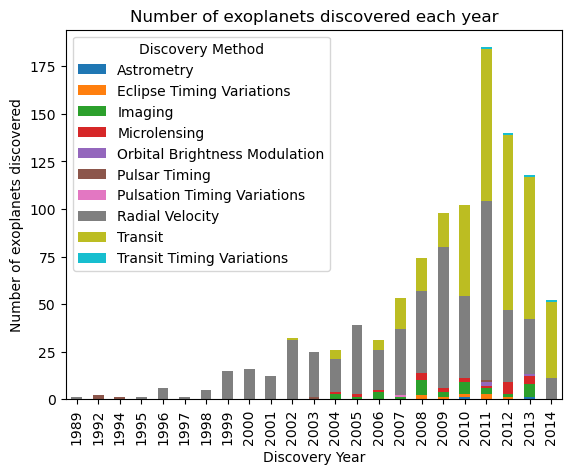

In [109]:
import seaborn as sns
import pandas as pd

data = sns.load_dataset('planets')
filtered_data = data.dropna(subset=['year', 'method'])

discovery_counts = filtered_data.groupby(['year', 'method']).size().unstack(fill_value=0)
discovery_counts.plot(kind='bar', stacked=True, colormap='tab10')

plt.title("Number of exoplanets discovered each year")
plt.xlabel("Discovery Year")
plt.ylabel("Number of exoplanets discovered")
plt.legend(title="Discovery Method")
plt.show()